In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

from PIL import Image

import pandas as pd
import numpy as np

In [2]:
dir_train = r'/content/drive/MyDrive/Osteoarthritis_Assignment_dataset/train'

In [3]:
dir_test = r'/content/drive/MyDrive/Osteoarthritis_Assignment_dataset/test'

In [4]:
dir_valid = r'/content/drive/MyDrive/Osteoarthritis_Assignment_dataset/Valid'

In [5]:
labels = list(os.listdir(dir_train))

In [6]:
labels

['Osteoarthritis', 'Normal']

In [7]:
os.listdir('/content/drive/MyDrive/Osteoarthritis_Assignment_dataset/train/Osteoarthritis')[0]

'9381181L.png'

In [8]:
image_shape = Image.open(f'{dir_train}/Osteoarthritis/9000099R.png')

In [9]:
height,width = image_shape.size
print(f'Height {height}, Width {width}')

Height 224, Width 224


In [10]:
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] 
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [11]:
train = get_data(dir_train)
val = get_data(dir_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


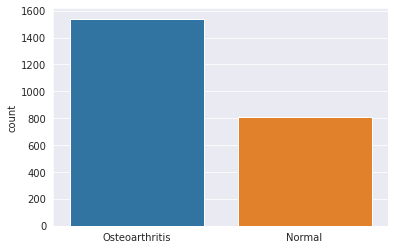

In [12]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Osteoarthritis")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Osteoarthritis')

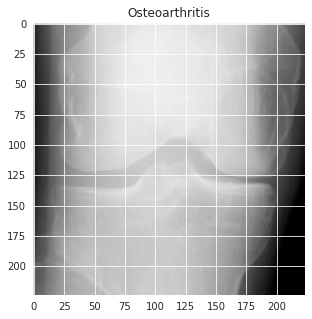

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Normal')

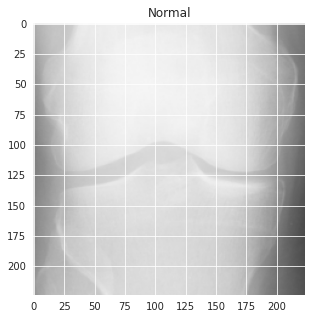

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [15]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range = 30,
        zoom_range = 0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip = True, 
        vertical_flip=False) 

In [17]:
datagen.fit(x_train)

In [18]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [19]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


74/74 [==============================] - 7s 63ms/step - loss: 0.6113 - accuracy: 0.6515 - val_loss: 0.5344 - val_accuracy: 0.6724
Epoch 2/50
74/74 [==============================] - 4s 48ms/step - loss: 0.5427 - accuracy: 0.6826 - val_loss: 0.5036 - val_accuracy: 0.6724
Epoch 3/50
74/74 [==============================] - 4s 48ms/step - loss: 0.4998 - accuracy: 0.7357 - val_loss: 0.4620 - val_accuracy: 0.7129
Epoch 4/50
74/74 [==============================] - 4s 48ms/step - loss: 0.4516 - accuracy: 0.7715 - val_loss: 0.4538 - val_accuracy: 0.7254
Epoch 5/50
74/74 [==============================] - 4s 48ms/step - loss: 0.4197 - accuracy: 0.7945 - val_loss: 0.4045 - val_accuracy: 0.8206
Epoch 6/50
74/74 [==============================] - 4s 48ms/step - loss: 0.3832 - accuracy: 0.8213 - val_loss: 0.3394 - val_accuracy: 0.8612
Epoch 7/50
74/74 [==============================] - 4s 51ms/step - loss: 0.3616 - accuracy: 0.8357 - val_loss: 0.3230 - val_accuracy: 0.8721
Epoch 8/50
74/74 [======

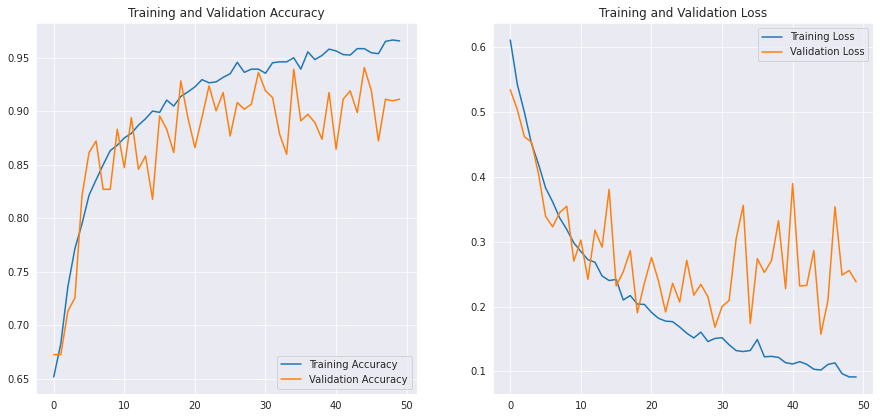

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()